<a href="https://colab.research.google.com/github/manojnaik06/-C-PROGRAMS/blob/main/dm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


In [ ]:
data = pd.read_csv("/content/heart_desease_data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


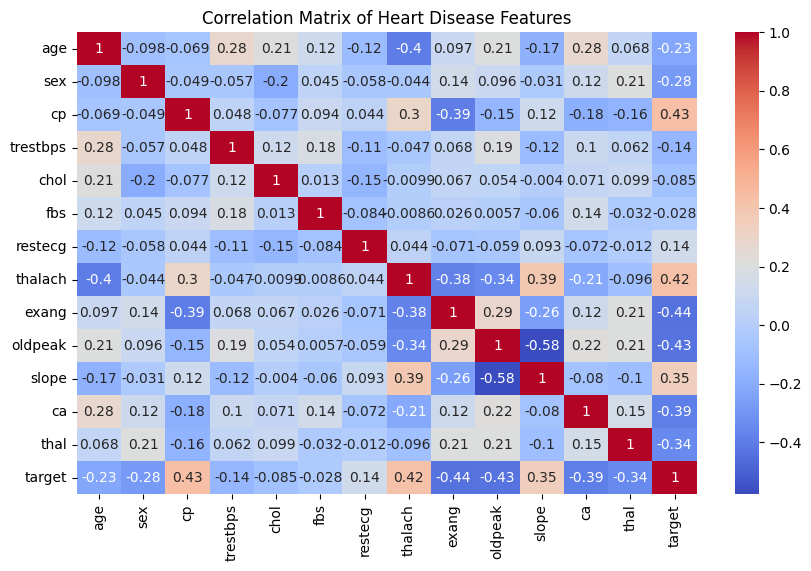

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Heart Disease Features")
plt.show()

In [ ]:
X = data.drop("target", axis=1)
y = data["target"]

/tmp/ipython-input-1168588830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


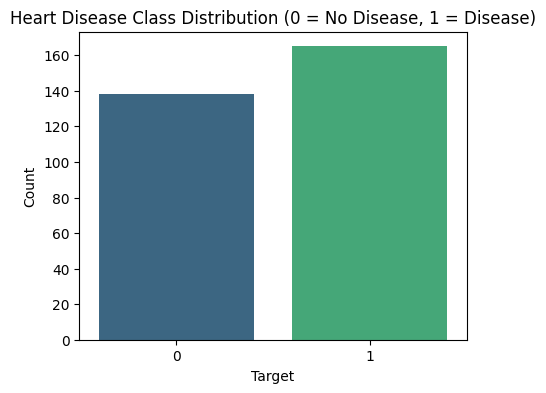

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x=y, palette="viridis")
plt.title("Heart Disease Class Distribution (0 = No Disease, 1 = Disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("\nModel Evaluation Metrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")


Model Evaluation Metrics:
Accuracy : 0.87
Precision: 0.90
Recall   : 0.84
F1-Score : 0.87


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[26,  3],
       [ 5, 27]])

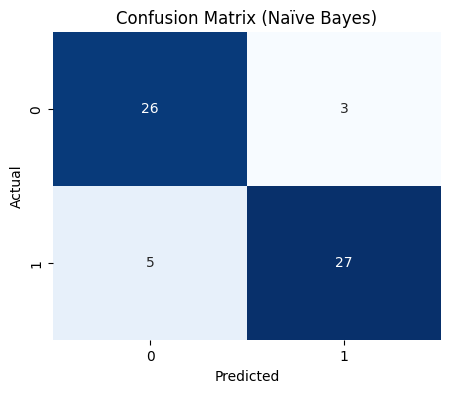

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Naïve Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

/tmp/ipython-input-3360628724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="mako")


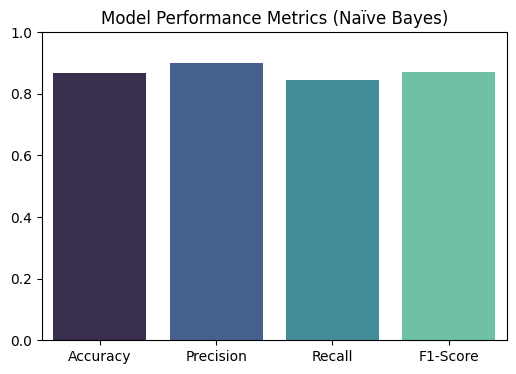

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=metrics, y=values, palette="mako")
plt.title("Model Performance Metrics (Naïve Bayes)")
plt.ylim(0, 1)
plt.show()

In [ ]:
sample = np.array([[52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3]])
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print("\nPrediction for new patient:")
print("Heart Disease Detected" if prediction[0] == 1 else "No Heart Disease")


Prediction for new patient:
No Heart Disease
